# Principal Component Analysis

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [3]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')
print(feature)
x = feature[:,0]
y = feature[:,1]

print(feature.shape)
print(np.vstack((x,y)).transpose())
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

[[3.38156 3.38911]
 [4.52788 5.85418]
 [2.65568 4.41199]
 [2.76523 3.71541]
 [2.84656 4.17551]
 [3.89067 6.48838]
 [3.47581 3.63285]
 [5.9113  6.68077]
 [3.92889 5.09845]
 [4.56184 5.6233 ]
 [4.57407 5.39765]
 [4.37173 5.46117]
 [4.19169 4.95469]
 [5.24409 4.66149]
 [2.83584 3.76802]
 [5.63527 6.31211]
 [4.68633 5.66524]
 [2.85051 4.62646]
 [5.11016 7.3632 ]
 [5.18256 4.64651]
 [5.70733 6.68104]
 [3.57968 4.80278]
 [5.63938 6.12044]
 [4.26347 4.68943]
 [2.53652 3.88449]
 [3.22383 4.94256]
 [4.92949 5.95502]
 [5.79296 5.10839]
 [2.81685 4.81896]
 [3.88882 5.10037]
 [3.34323 5.89301]
 [5.87973 5.52142]
 [3.10392 3.8571 ]
 [5.33151 4.68074]
 [3.37543 4.56538]
 [4.77668 6.25435]
 [2.67575 3.73097]
 [5.50028 5.67948]
 [1.7971  3.24754]
 [4.32251 5.1111 ]
 [4.421   6.02564]
 [3.1793  4.43686]
 [3.03354 3.97879]
 [4.60935 5.87979]
 [2.96379 3.30025]
 [3.97176 5.40774]
 [1.18023 2.87869]
 [1.91895 5.07108]
 [3.95525 4.50533]
 [5.11795 6.08507]]
(50, 2)
[[3.38156 3.38911]
 [4.52788 5.85418]
 [2

## plot the input data

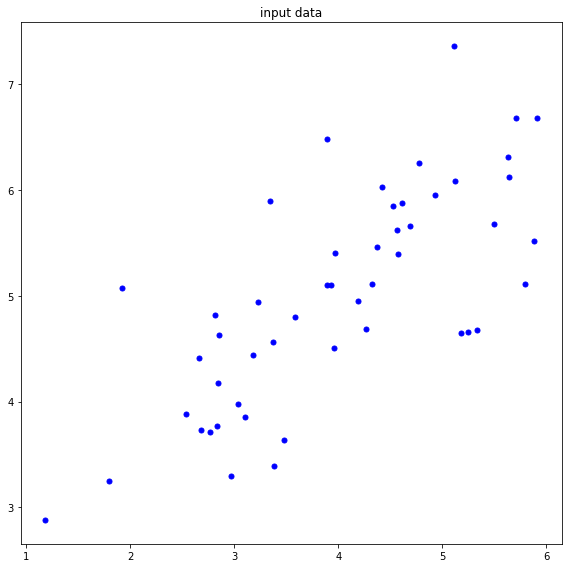

In [4]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue', s=25, marker='o')

plt.axis('auto')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

[-0.5233151   0.46381907 -1.14839444 -1.0540573  -0.98402134 -0.0849036
 -0.4421533   1.65512791 -0.05199109  0.49306315  0.50359481  0.32935312
  0.17431471  1.08057125 -0.99325269  1.41742932  0.60026562 -0.98061987
  0.96523968  1.02758572  1.47948257 -0.3527074   1.42096858  0.23612685
 -1.25100707 -0.65914163  0.80965876  1.55322141 -1.00960561 -0.08649669
 -0.55632233  1.62794193 -0.76240011  1.15585151 -0.52859385  0.678069
 -1.1311115   1.30118495 -1.88774615  0.28696815  0.37178115 -0.69748789
 -0.82300666  0.53397558 -0.8830707  -0.01507431 -2.41895336 -1.78281708
 -0.02929162  0.97194791]
[[-0.5233151  -1.59279489]
 [ 0.46381907  0.84034673]
 [-1.14839444 -0.58316356]
 [-1.0540573  -1.27072124]
 [-0.98402134 -0.8165806 ]
 [-0.0849036   1.46633237]
 [-0.4421533  -1.35221189]
 [ 1.65512791  1.65623047]
 [-0.05199109  0.09440519]
 [ 0.49306315  0.61245716]
 [ 0.50359481  0.38972985]
 [ 0.32935312  0.45242712]
 [ 0.17431471 -0.04749279]
 [ 1.08057125 -0.33689517]
 [-0.99325269 -

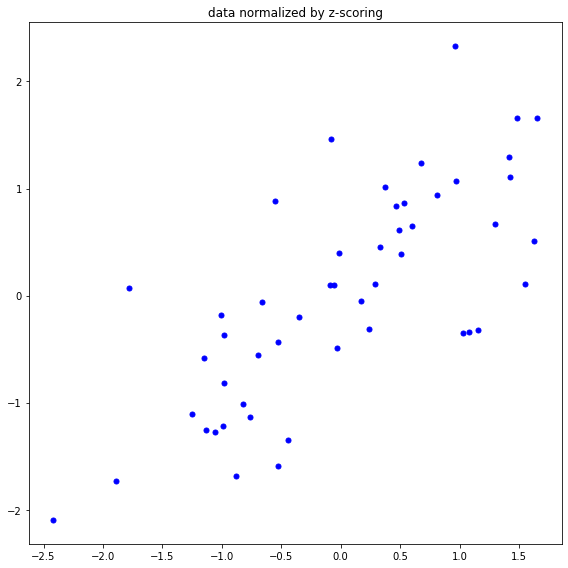

In [90]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
# ===================================================
normal_x = (x - np.mean(x)) / np.std(x)
normal_y = (y - np.mean(y)) / np.std(y)

normal_feature = np.vstack((normal_x,normal_y)).transpose()
print(normal_x)
print(normal_feature)


print("mean of x = ", np.mean(normal_x))
print("mean of y = ", np.mean(normal_y))
print("std of x = ", np.std(normal_x))
print("std of y = ", np.std(normal_y))
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
plt.axis('auto')
# ===================================================
plt.tight_layout()
plt.show()

## compute covariance matrix

In [78]:
def compute_covariance(feature):
    Sigma = (np.matmul(np.transpose(feature),feature) ) / feature.shape[0]

    return Sigma

print(compute_covariance(normal_feature))


[[1.      0.73553]
 [0.73553 1.     ]]


## compute principal directions

In [112]:
def compute_eigen(X): # X is sigma
    S, U = np.linalg.eig(X)
    return S, U
Sigma = compute_covariance(normal_feature)
S, U = compute_eigen(Sigma)
print(U[: ,0])

[0.70710678 0.70710678]


(array([1.73553, 0.26447]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
1.735530003844032
0
[0.70710678 0.70710678]
[-0.70710678  0.70710678]


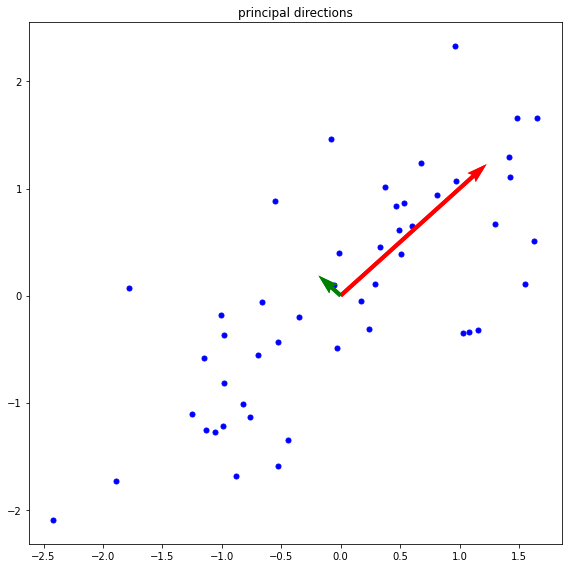

In [131]:
plt.figure(figsize=(8,8))
plt.title('principal directions')
Sigma = compute_covariance(normal_feature)
S, U = compute_eigen(Sigma)
print(compute_eigen(Sigma))

first_pc = max(S)
print(first_pc)
first_pc_index = np.where(S == first_pc)
print(first_pc_index[0][0])
first_pc_vector = U[:, first_pc_index[0][0]]
print(first_pc_vector)

second_pc = max(np.delete(S, first_pc_index))
second_pc_index = np.where(S == second_pc)
second_pc_vector = U[:, second_pc_index[0][0]]
origin = np.array([[0,0],[0,0]])
print(second_pc_vector)

plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
plt.quiver(*origin, first_pc_vector[0] * first_pc ,first_pc_vector[1]*first_pc, color='r', angles='xy', scale=1, scale_units='xy')
plt.quiver(*origin, second_pc_vector[0] * second_pc,second_pc_vector[1] * second_pc, color='g', angles='xy', scale=1, scale_units='xy')

plt.axis('auto')
plt.tight_layout()
plt.show()

## first principal axis

[0.70710678 0.70710678]


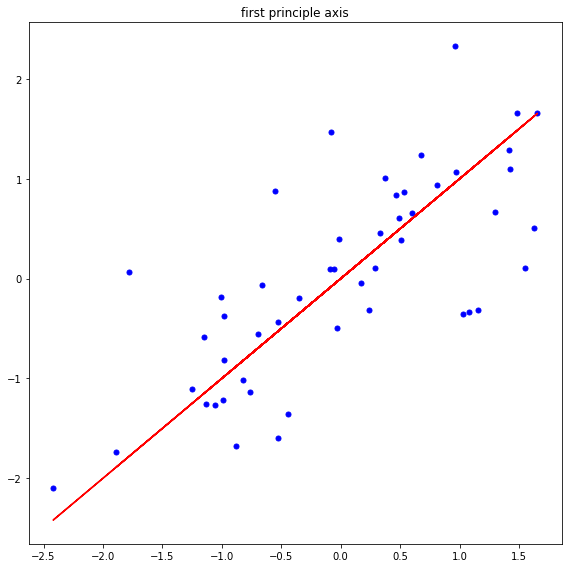

In [133]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')

func = normal_x * (first_pc_vector[1] /  first_pc_vector[0])
print(first_pc_vector)
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
plt.plot(normal_x, func, 'r')
plt.tight_layout()
plt.show()

## second principal axis

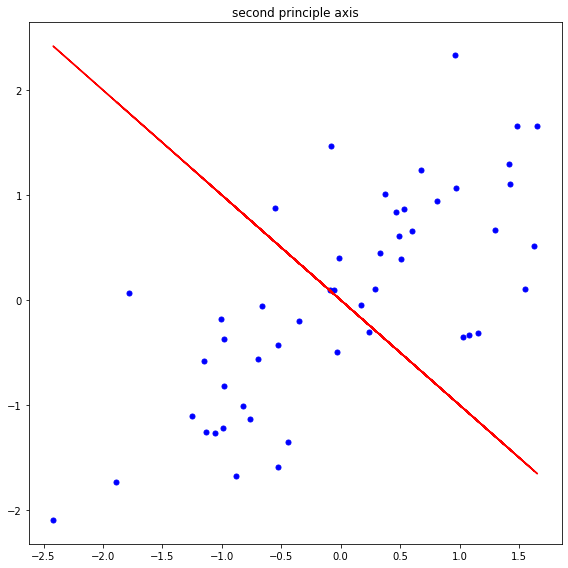

In [134]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')
func2 = normal_x *(second_pc_vector[1] /  second_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
plt.plot(normal_x, func2, 'r')
plt.tight_layout()

plt.show()

## compute the projection of point onto the line

In [135]:
def compute_projection_onto_line(feature, vector):
    v_norm = np.sqrt(sum(vector**2))
    v_norm_vector =  vector / v_norm
    projection = np.zeros((50,2))

    temp = np.dot(feature,vector) / v_norm
    for i in range(temp.shape[0]):
        projection[i] = (temp[i]*v_norm_vector)

    print(projection.shape)
    return projection
projection = compute_projection_onto_line(normal_feature, first_pc_vector)
print(projection)
print(type(projection[0]))
print(len(projection))

(50, 2)
[[-1.058055   -1.058055  ]
 [ 0.6520829   0.6520829 ]
 [-0.865779   -0.865779  ]
 [-1.16238927 -1.16238927]
 [-0.90030097 -0.90030097]
 [ 0.69071439  0.69071439]
 [-0.8971826  -0.8971826 ]
 [ 1.65567919  1.65567919]
 [ 0.02120705  0.02120705]
 [ 0.55276016  0.55276016]
 [ 0.44666233  0.44666233]
 [ 0.39089012  0.39089012]
 [ 0.06341096  0.06341096]
 [ 0.37183804  0.37183804]
 [-1.10602267 -1.10602267]
 [ 1.3548874   1.3548874 ]
 [ 0.62705978  0.62705978]
 [-0.67604566 -0.67604566]
 [ 1.64753055  1.64753055]
 [ 0.33795229  0.33795229]
 [ 1.56798978  1.56798978]
 [-0.2750713  -0.2750713 ]
 [ 1.26206331  1.26206331]
 [-0.0365951  -0.0365951 ]
 [-1.17741914 -1.17741914]
 [-0.35930365 -0.35930365]
 [ 0.87476969  0.87476969]
 [ 0.82871892  0.82871892]
 [-0.59553519 -0.59553519]
 [ 0.00490181  0.00490181]
 [ 0.16117573  0.16117573]
 [ 1.06991934  1.06991934]
 [-0.94663328 -0.94663328]
 [ 0.41897851  0.41897851]
 [-0.48017708 -0.48017708]
 [ 0.9567013   0.9567013 ]
 [-1.19323714 -1.193

## projcet to the first principal axis

In [56]:
print(np.dot(np.array([1,2]), np.array([3,4])))

11


(50, 2)


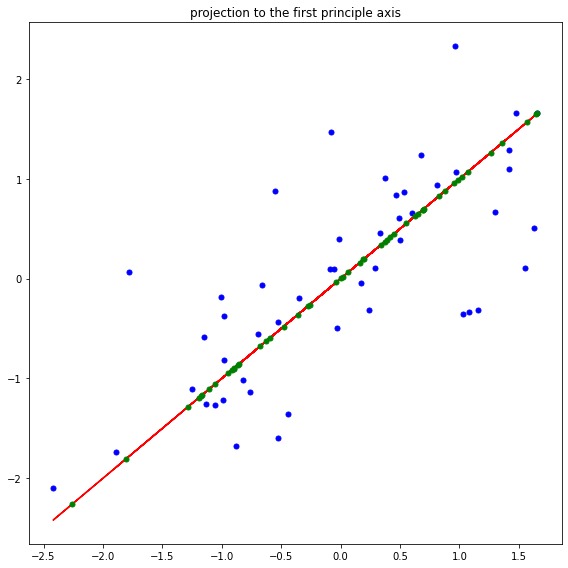

In [136]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
func = normal_x *(first_pc_vector[1] /  first_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

projection = compute_projection_onto_line(normal_feature, first_pc_vector)
plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
plt.plot(normal_x, func, 'r', zorder=-1)
plt.tight_layout()
plt.show()

## projcet to the second principal axis

(50, 2)


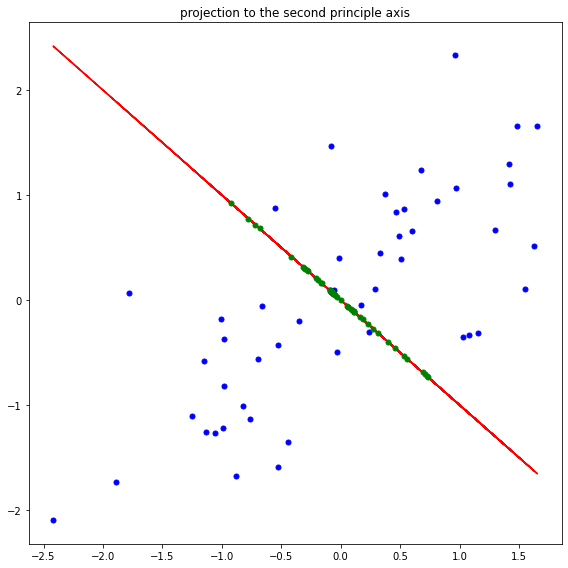

In [137]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
func2= normal_x *(second_pc_vector[1] /  second_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

projection = compute_projection_onto_line(normal_feature, second_pc_vector)
plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
plt.plot(normal_x, func2, 'r', zorder=-1)
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

(50, 2)


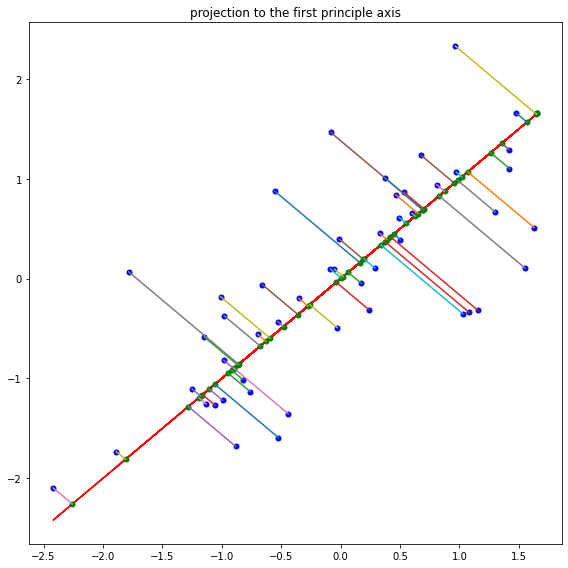

In [139]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
# ===================================================
func = normal_x *(first_pc_vector[1] /  first_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

projection = compute_projection_onto_line(normal_feature, first_pc_vector)
plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
plt.plot(normal_x, func, 'r', zorder=-1)

for i in range(feature.shape[0]):
    plt.plot([normal_x[i], projection[:, 0][i]], [normal_y[i], projection[:, 1][i]])
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

(50, 2)


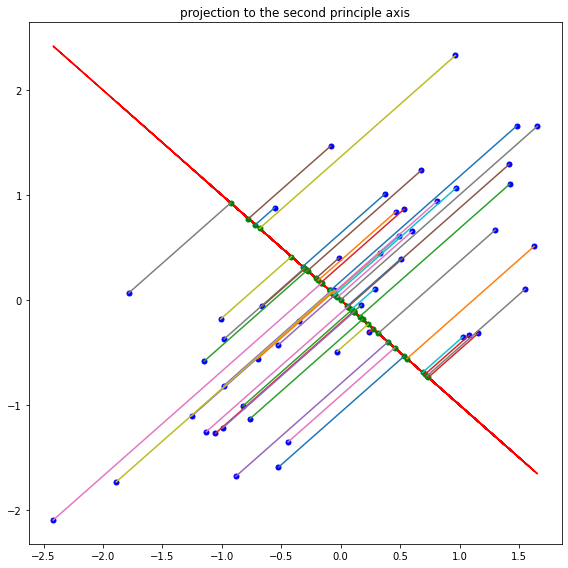

In [140]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
func2 = normal_x *(second_pc_vector[1] /  second_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

projection = compute_projection_onto_line(normal_feature, second_pc_vector)
plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
plt.plot(normal_x, func2, 'r', zorder=-1)

for i in range(feature.shape[0]):
    plt.plot([normal_x[i], projection[:, 0][i]], [normal_y[i], projection[:, 1][i]])
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

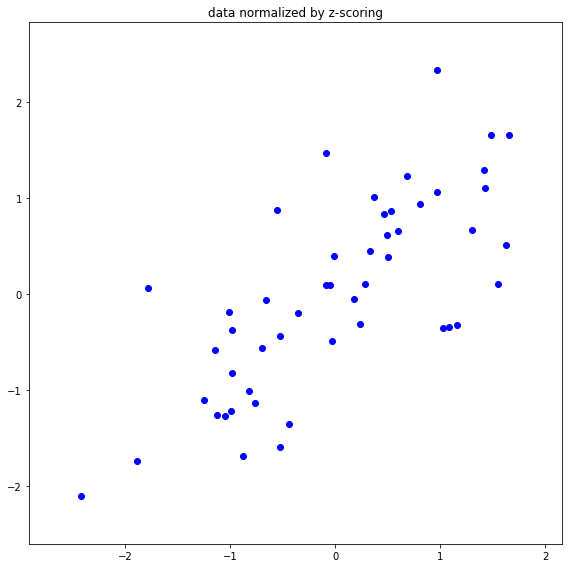

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

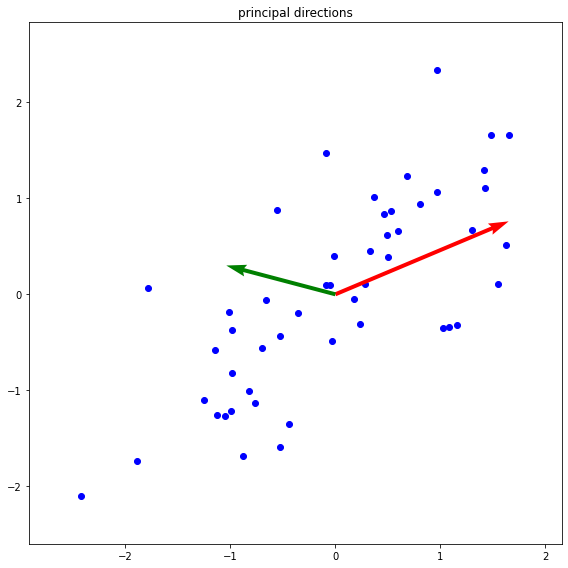

***

### 3. plot the first principal axis in red on the normalized data in blue

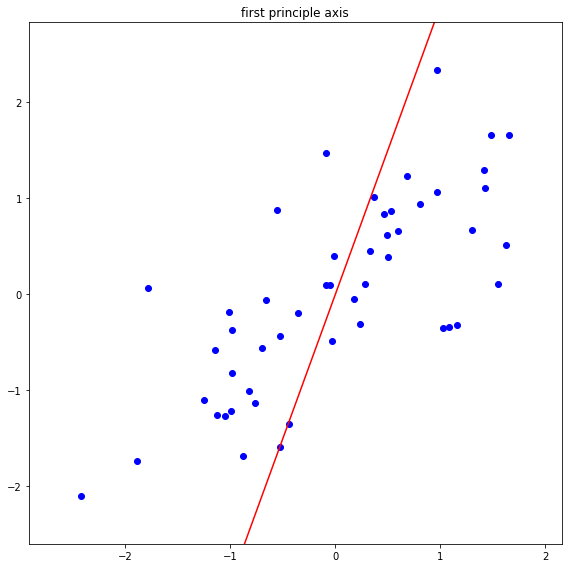

***

### 4. plot the second principal axis in red on the normalized data in blue

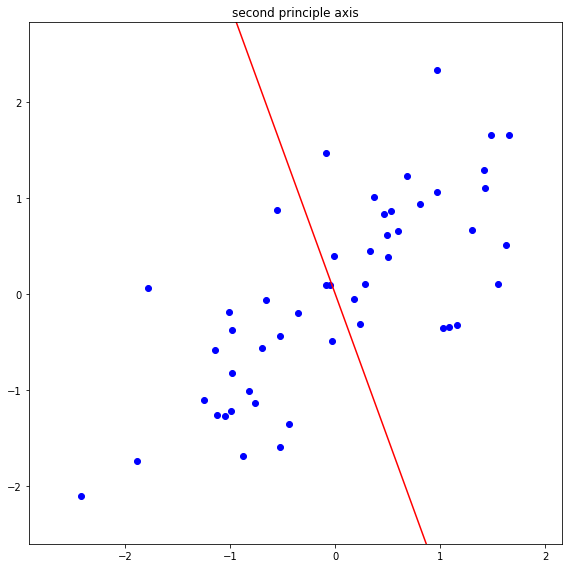

***

### 5. plot the projection of data in green onto the first principal axis in red

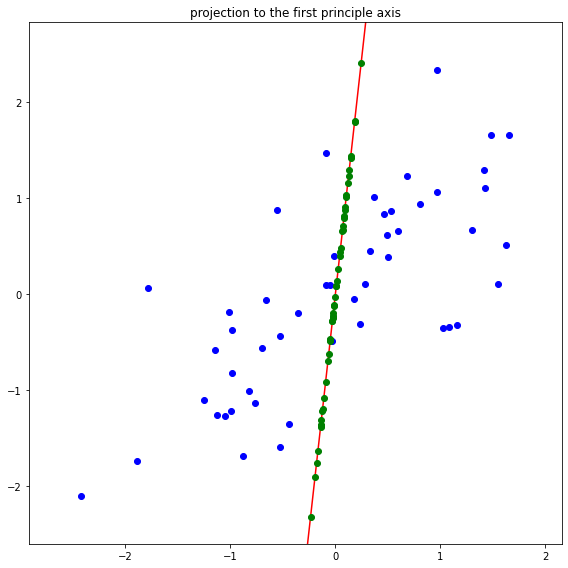

***

### 6. plot the projection of data in green onto the second principal axis in red

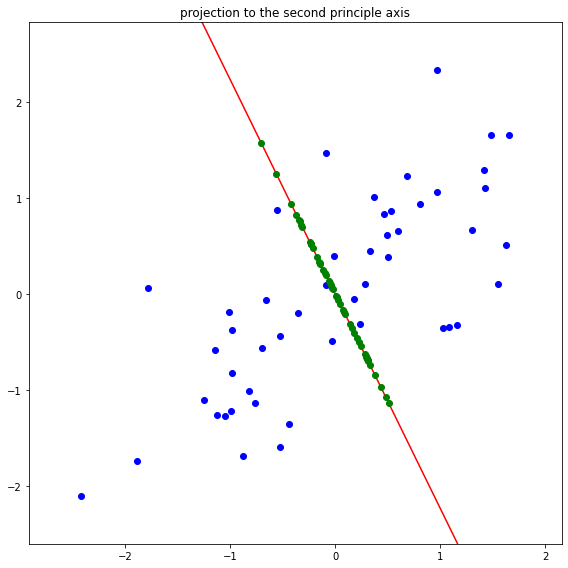

***

### 7. plot the projection line in grey onto the first principal axis

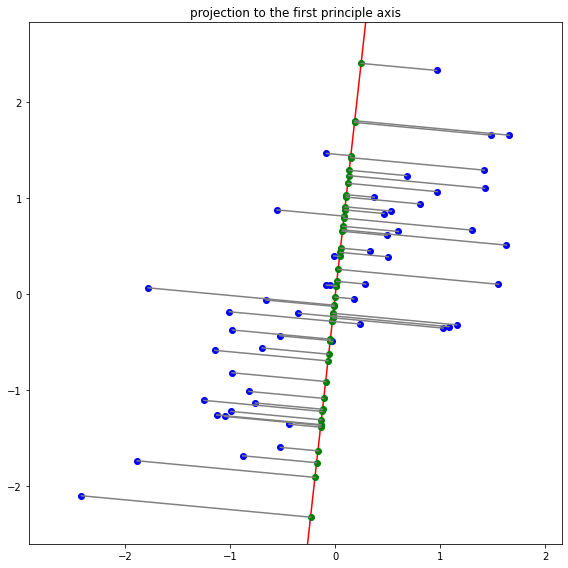

***

### 8. plot the projection line in grey onto the second principal axis

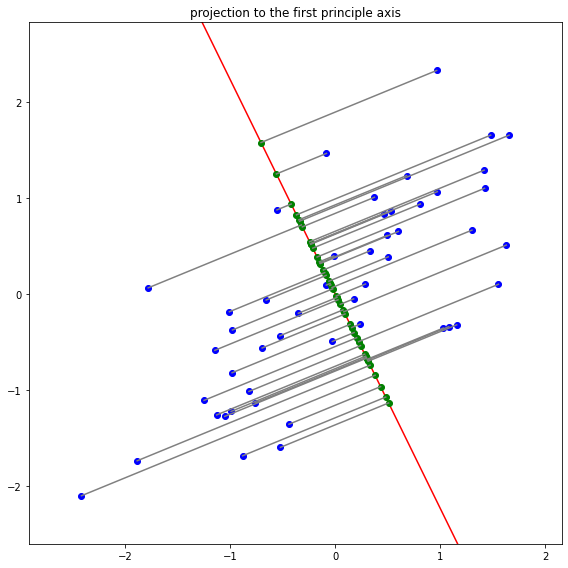

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***